# Simphony circuit simulator

[Simphony](https://simphonyphotonics.readthedocs.io/en/latest/) is a circuit simulator based on [scikit-rf](https://scikit-rf.readthedocs.io/en/latest/)

The main advantage of simphony over [SAX](https://flaport.github.io/sax/) is that simphony works in Windows, Linux and MacOs. While SAX only works on MacOs and Linux.

It also supports the SiEPIC PDK library natively.

## Component models

You can use component models from :

- Sparameters from Lumerical FDTD simulations thanks to the gdsfactory Lumerical plugin
- [SiPANN](https://sipann.readthedocs.io/en/latest/?badge=latest) open source package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdsfactory as gf

import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc

2022-04-29 12:51:41.742 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.3.4


2022-04-29 12:51:43.496501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-29 12:51:43.496541: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
c = gf.components.mzi()
n = c.get_netlist()

### Straight

Lets start with the Sparameter model of a straight waveguide.

The models are for lossless elements.

2022-04-29 12:51:45.976 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


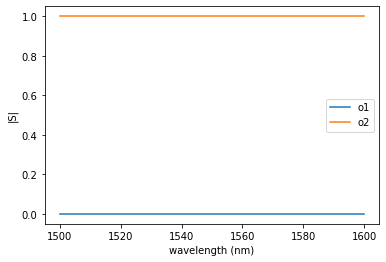

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [3]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-04-29 12:51:46.113 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


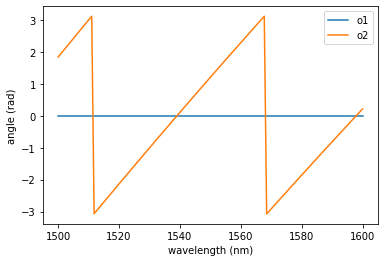

<AxesSubplot:xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [4]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, phase=True, wavelengths=wavelengths)

### Bend

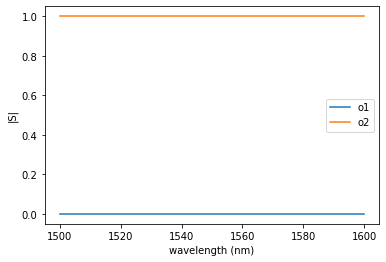

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [5]:
m = gc.bend_circular(radius=2)  # this bend should have some loss
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-04-29 12:51:46.365 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


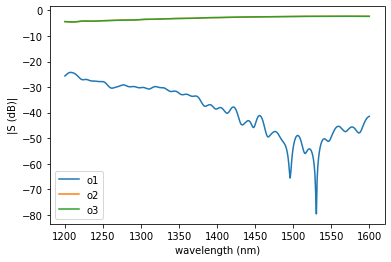

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [6]:
m = gc.mmi1x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in="o1")

2022-04-29 12:51:46.538 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


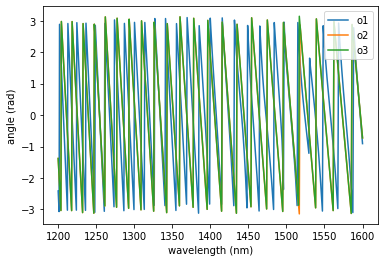

(1540.0, 1570.0)

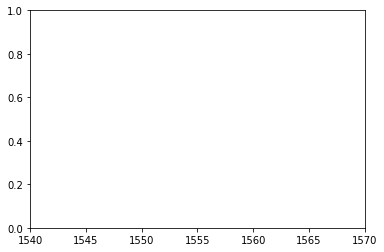

In [7]:
m = gc.mmi1x2()
gs.plot_model(m, pin_in="o1", phase=True)
plt.xlim([1540, 1570])

In [8]:
m.pins

('o1', 'o2', 'o3')

As you can see the MMI has -20dB reflection and -3dB transmission

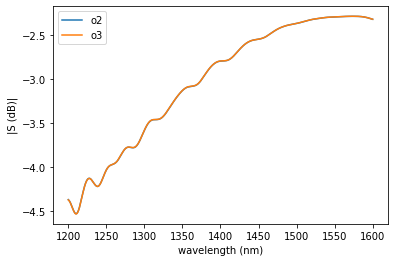

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [9]:
gs.plot_model(m, pins=("o2", "o3"))

In [10]:
m.pins

('o1', 'o2', 'o3')

2022-04-29 12:51:46.985 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi2x2_a819ff51.dat


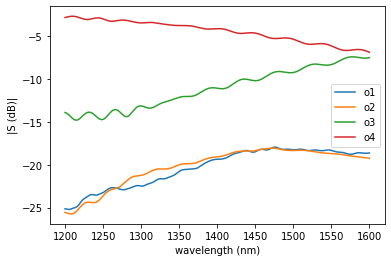

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [11]:
m = gc.mmi2x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m)

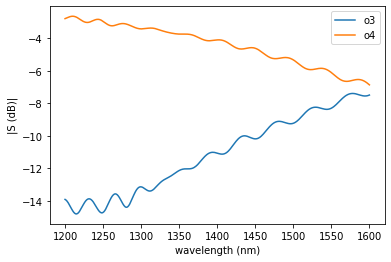

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [12]:
gs.plot_model(m, pins=("o3", "o4"))

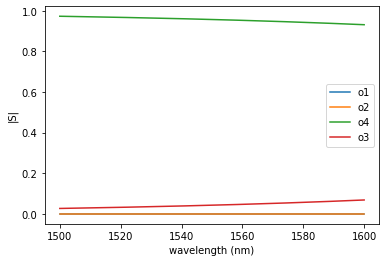

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [13]:
m = gc.coupler_ring()
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

In [14]:
gc.coupler_ring?

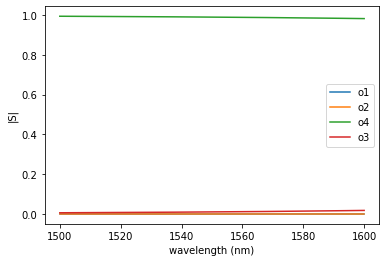

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [15]:
m = gc.coupler_ring(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

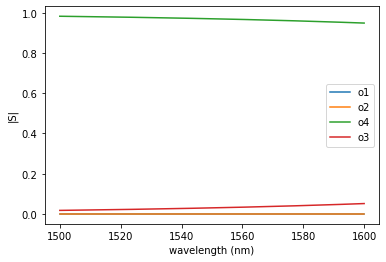

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [16]:
m = gc.coupler(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

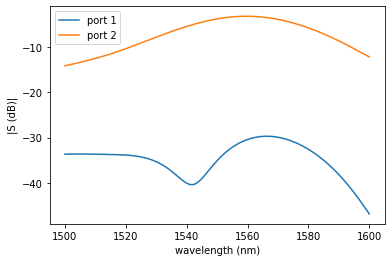

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [17]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")

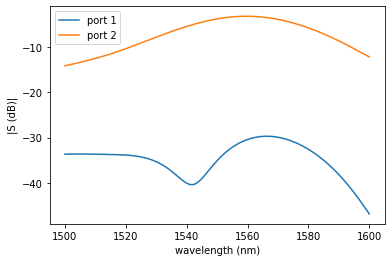

(-10.0, -3.0)

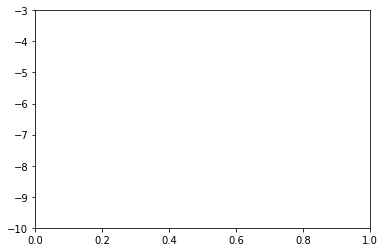

In [18]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")
plt.ylim([-10, -3])

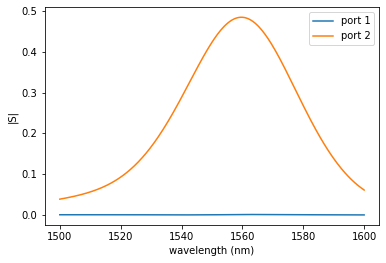

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [19]:
m = gc.gc1550te()
gs.plot_model(m, logscale=False, pin_in="port 1")

## Circuit simulations

With Simphony you can also combine components into circuits

### MZI interferometer

In [20]:
import matplotlib.pyplot as plt
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
import gdsfactory as gf

mzi: uid 3, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references


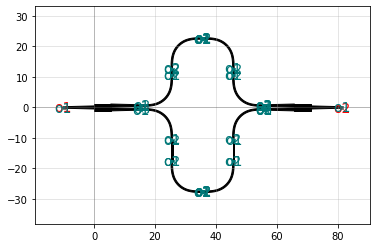

mzi: uid 3, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [21]:
c = gf.components.mzi(delta_length=10)
c

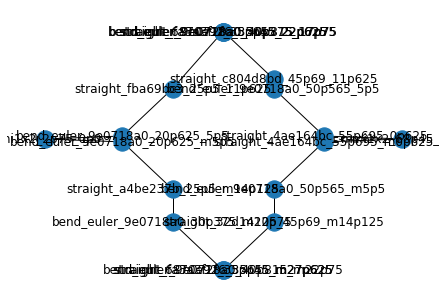

In [22]:
c.plot_netlist()

2022-04-29 12:51:48.936 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


2022-04-29 12:51:48.956 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


2022-04-29 12:51:48.978 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-04-29 12:51:48.980 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


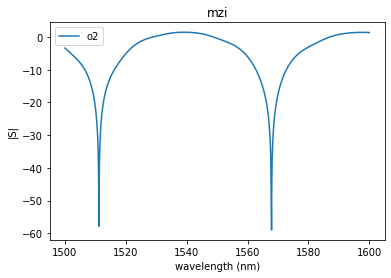

<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [23]:
circuit = gs.components.mzi(delta_length=10, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

2022-04-29 12:51:49.124 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


2022-04-29 12:51:49.144 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


2022-04-29 12:51:49.163 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-04-29 12:51:49.164 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


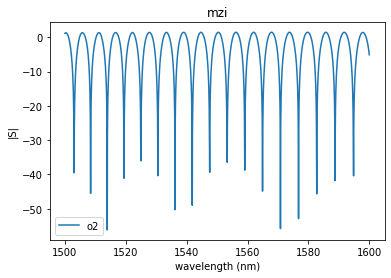

<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [24]:
circuit = gs.components.mzi(delta_length=100, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

Lets add grating couplers to the mzi circuit.

mzi_9f5eba71_move_c8eb0_de168e30: uid 29, ports ['vertical_te_00', 'vertical_te_1'], aliases [], 0 polygons, 5 references


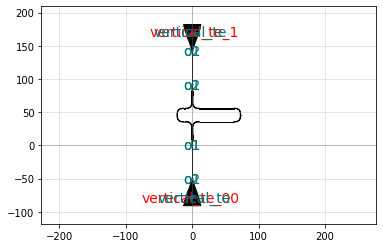

mzi_9f5eba71_move_c8eb0_de168e30: uid 29, ports ['vertical_te_00', 'vertical_te_1'], aliases [], 0 polygons, 5 references

In [25]:
mzi_layout = gf.components.mzi(delta_length=100)
mzi_with_gc_layout = gf.routing.add_fiber_single(
    component=mzi_layout, with_loopback=False
)
mzi_with_gc_layout

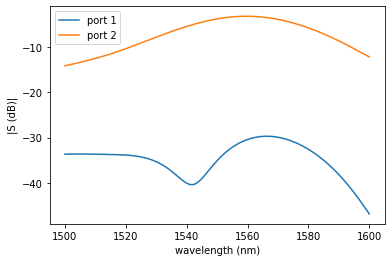

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [26]:
c = gc.gc1550te()
gs.plot_model(c, pin_in="port 1")

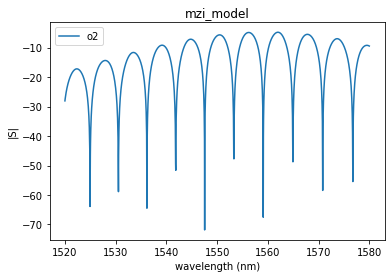

<AxesSubplot:title={'center':'mzi_model'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [27]:
circuit_gc = gs.add_gc(circuit=circuit, gc=gs.components.gc1550te)

gs.plot_circuit(
    circuit_gc,
    start=1520e-9,
    stop=1580e-9,
    logscale=True,
)

### MZI intereferometer from layout

In [28]:
from simphony.library import siepic
from simphony.netlist import Subcircuit
import gdsfactory as gf

import gdsfactory.simulation.simphony as gs

c = gf.components.mzi(delta_length=10)
cm = gs.component_to_circuit(c)

2022-04-29 12:51:50.319 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


2022-04-29 12:51:50.341 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a819ff51.dat


2022-04-29 12:51:50.363 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-04-29 12:51:50.365 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-04-29 12:51:50.367 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-04-29 12:51:50.368 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-04-29 12:51:50.370 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-04-29 12:51:50.372 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-04-29 12:51:50.373 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-04-29 12:51:50.375 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-04-29 12:51:50.377 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-04-29 12:51:50.377 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


In [29]:
cm.pins

{<Pin 'o1' at <Element 'mmi1x2_2p75_0p0' at 0x7f46211d00a0>>,
 <Pin 'o1' at <Element 'mmi1x2_68p45_0p0' at 0x7f46211d07f0>>}

In [30]:
p2 = cm.pins.pop()
p2.name = "o2"

In [31]:
cm.pins

{<Pin 'o1' at <Element 'mmi1x2_2p75_0p0' at 0x7f46211d00a0>>,
 <Pin 'o2' at <Element 'mmi1x2_68p45_0p0' at 0x7f46211d07f0>>}

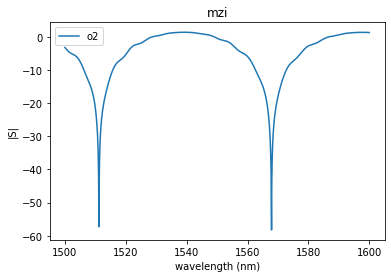

<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [32]:
gs.plot_circuit(cm)

### Ring resonator


2022-04-29 12:51:50.648 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/simphony/plot_circuit.py:53: RuntimeWarning: divide by zero encountered in log10
  y = 10 * np.log10(y) if logscale else y


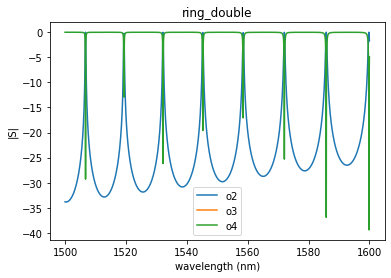

<AxesSubplot:title={'center':'ring_double'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [33]:
c = gc.ring_double(radius=5)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])

2022-04-29 12:51:50.952 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/simphony/plot_circuit.py:53: RuntimeWarning: divide by zero encountered in log10
  y = 10 * np.log10(y) if logscale else y


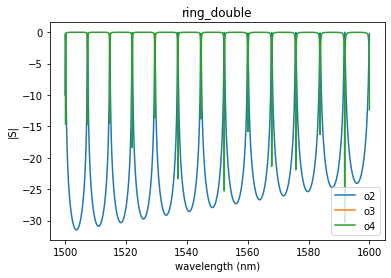

<AxesSubplot:title={'center':'ring_double'}, xlabel='wavelength (nm)', ylabel='|S|'>

In [34]:
c = gs.components.ring_double(radius=10)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])